### Step 0: Cargar librerias

In [1]:
import torch                                          # deep learning
import torch.nn as nn                                 # basic function to Neural Network
import torch.nn.functional as F                       # torch functions: sigmoid, tanh, relu
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # cross validation
from sklearn.metrics import confusion_matrix           # Para crear matriz de confusion
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt                       # ploting


### Steps 1: Datos

In [2]:
# data 
df = pd.read_csv('data/iris.data', names=["sepal_length", "sepal_width", 
                                          "petal_length", "petal_width", "species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = df.iloc[:, 0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = df.iloc[:, [4]]
labels = {key: id for key, id in zip(y.species.unique(), [x for x in range(3)])}
y = y.replace({"species": labels}).squeeze()
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [5]:
# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

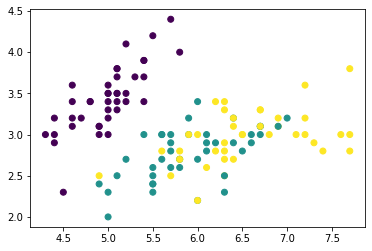

In [6]:
# plot 
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)

### Step 2: Modelo

In [8]:
class m_perceptron_cls(nn.Module):
    def __init__(self):
        super().__init__()
        # linear, RNN, CNN, actication function
        self.intput1 = nn.Linear(4, 5)    # input_size, output_size
        self.h1 = nn.Linear(5, 3)         # input_size, output_size
        self.act = nn.Softmax(dim=1)      # sofmax, ejemplo [0.1, 0.7, 0.2]

    def forward(self, x):
        # input: x [rows x features]
        h1 = self.intput1(x)       # forward
        h1 = torch.sigmoid(h1)
        output = self.h1(h1)
        #output = torch.sigmoid(h1) # activation function, no-linealidad
        #output = torch.relu(h1) #ivation function, no-linealidad
        output = self.act(output) #ivation function, no-linealidad
        return output

In [9]:
# model initition
m1 = m_perceptron_cls()
m1

m_perceptron_cls(
  (intput1): Linear(in_features=4, out_features=5, bias=True)
  (h1): Linear(in_features=5, out_features=3, bias=True)
  (act): Softmax(dim=1)
)

In [10]:
# Transform from pandas to numpy to torch 
X_train = torch.tensor(X_train.to_numpy())
X_train = X_train.to(torch.float)

X_test = torch.tensor(X_test.to_numpy())
X_test = X_test.to(torch.float)

y_train = torch.tensor(y_train.to_numpy())

In [11]:
# loss function 
criterion = nn.CrossEntropyLoss()  # y_hat and y

In [12]:
# learning rate
learning_rate = 0.01

In [13]:
# Optimizer
optimizer = torch.optim.SGD(m1.parameters(), lr = learning_rate)

In [14]:
# training
n_epochs = 15000 
list_loss = []
for i in range(n_epochs):
    #print('Epoch:', i + 1,'/', n_epochs)
    optimizer.zero_grad()             # set to zero gradiants
    output = m1(X_train)              # forward
    #print(output.shape)
    loss = criterion(output, y_train) # y_hat and y
    list_loss.append(loss.item())     # save loss value
    
    loss.backward()                   # backpropagation: dL/dW 
    optimizer.step()                  # update weights

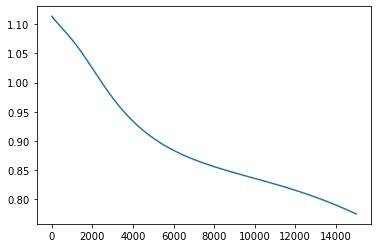

In [15]:
# plot loss
plt.plot(list_loss)

### Step 3: Resultados

In [16]:
# Testing 
with torch.no_grad():
    output = m1(X_test)                  # forward testing

# to numpy 
y_hat = output.numpy()
y_hat = [np.argmax(i) for i in y_hat]

In [17]:
print(f'Accuracy:{accuracy_score(y_test, y_hat)}')

Accuracy:1.0


In [18]:
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)